In [1]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
X, y = iris['data'][:, (2,3)], (iris['target'] == 0).astype(np.int32)

In [3]:
perceptron = Perceptron()
perceptron.fit(X, y)
perceptron.predict([[2, 0.5]])

array([0], dtype=int32)

In [5]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

2023-06-03 16:38:17.956567: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-03 16:38:17.984224: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-03 16:38:17.984563: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-03 16:38:18.511474: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", 
               "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [10]:
class_names[y_train[0]]

'Coat'

In [11]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


2023-06-03 16:38:42.257975: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-03 16:38:42.269329: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [12]:
model.layers

In [13]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [14]:
model.get_layer('dense') is hidden1

True

In [15]:
weights, biases = hidden1.get_weights()

In [16]:
weights.shape

(784, 300)

In [17]:
biases.shape

(300,)

In [18]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", 
              metrics=["accuracy"])

In [19]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7183 - accuracy: 0.7633 - val_loss: 0.5110 - val_accuracy: 0.8280
Epoch 2/30
1719/1719 [==============================] - 1s 859us/step - loss: 0.4866 - accuracy: 0.8297 - val_loss: 0.4434 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 2s 898us/step - loss: 0.4408 - accuracy: 0.8460 - val_loss: 0.4171 - val_accuracy: 0.8598
Epoch 4/30
1719/1719 [==============================] - 1s 869us/step - loss: 0.4126 - accuracy: 0.8556 - val_loss: 0.3940 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 2s 881us/step - loss: 0.3931 - accuracy: 0.8619 - val_loss: 0.3836 - val_accuracy: 0.8696
Epoch 6/30
1719/1719 [==============================] - 2s 880us/step - loss: 0.3767 - accuracy: 0.8678 - val_loss: 0.3785 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 1s 859us/step - loss: 0.3640 - accuracy: 0.8717 - val_loss: 0.3594 - v

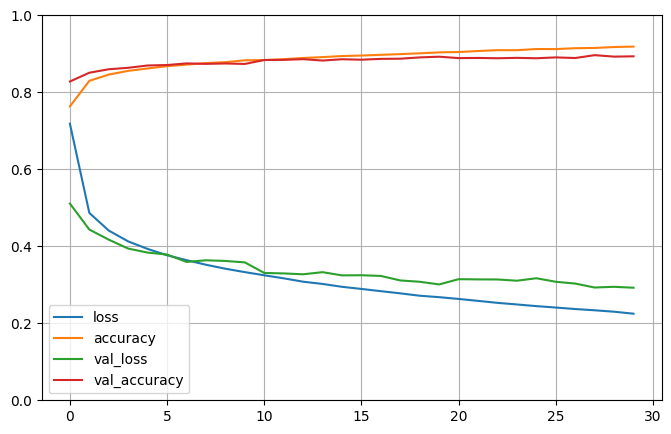

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 738us/step - loss: 70.2611 - accuracy: 0.8356


[70.26112365722656, 0.8356000185012817]

In [22]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 45ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
y_pred = model.predict_classes(X_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [24]:
classes = np.argmax(y_proba, axis=1)
classes

array([9, 2, 1])

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.005))
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)


Epoch 1/30
363/363 [==============================] - 0s 882us/step - loss: 1.1956 - val_loss: 0.6605
Epoch 2/30
363/363 [==============================] - 0s 731us/step - loss: 0.5755 - val_loss: 0.5427
Epoch 3/30
363/363 [==============================] - 0s 722us/step - loss: 0.4705 - val_loss: 0.5065
Epoch 4/30
363/363 [==============================] - 0s 717us/step - loss: 0.4380 - val_loss: 0.4884
Epoch 5/30
363/363 [==============================] - 0s 711us/step - loss: 0.4218 - val_loss: 0.4797
Epoch 6/30
363/363 [==============================] - 0s 789us/step - loss: 0.4117 - val_loss: 0.4788
Epoch 7/30
363/363 [==============================] - 0s 743us/step - loss: 0.4042 - val_loss: 0.4722
Epoch 8/30
363/363 [==============================] - 0s 711us/step - loss: 0.3984 - val_loss: 0.4663
Epoch 9/30
363/363 [==============================] - 0s 725us/step - loss: 0.3938 - val_loss: 0.4603
Epoch 10/30
363/363 [==============================] - 0s 654us/step - loss: 0.389

In [26]:
# Complex Model (Wide and Deep Net)
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

# If we want to have different input features for the deep and wide path
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [27]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))
y_pred

Epoch 1/20


/home/eddie/code/ml/ml_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


363/363 [==============================] - 1s 973us/step - loss: 2.1066 - val_loss: 0.9649
Epoch 2/20
363/363 [==============================] - 0s 817us/step - loss: 0.8529 - val_loss: 0.7446
Epoch 3/20
363/363 [==============================] - 0s 756us/step - loss: 0.7076 - val_loss: 0.6694
Epoch 4/20
363/363 [==============================] - 0s 808us/step - loss: 0.6412 - val_loss: 0.6272
Epoch 5/20
363/363 [==============================] - 0s 777us/step - loss: 0.5969 - val_loss: 0.5979
Epoch 6/20
363/363 [==============================] - 0s 797us/step - loss: 0.5638 - val_loss: 0.5754
Epoch 7/20
363/363 [==============================] - 0s 770us/step - loss: 0.5398 - val_loss: 0.5589
Epoch 8/20
363/363 [==============================] - 0s 767us/step - loss: 0.5199 - val_loss: 0.5463
Epoch 9/20
363/363 [==============================] - 0s 788us/step - loss: 0.5042 - val_loss: 0.5360
Epoch 10/20
363/363 [==============================] - 0s 820us/step - loss: 0.4911 - val_los

array([[4.1000304],
       [3.3645573],
       [2.085221 ]], dtype=float32)

In [28]:
# Multiple output network
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])

# output = keras.layers.Dense(1, name="output")(concat)
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1],optimizer="sgd")
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=20, validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9287 - main_output_loss: 0.8511 - aux_output_loss: 1.6274 - val_loss: 1.5530 - val_main_output_loss: 1.5011 - val_aux_output_loss: 2.0202
Epoch 2/20
363/363 [==============================] - 0s 866us/step - loss: 1.0639 - main_output_loss: 0.9583 - aux_output_loss: 2.0143 - val_loss: 0.6123 - val_main_output_loss: 0.5594 - val_aux_output_loss: 1.0881
Epoch 3/20
363/363 [==============================] - 0s 953us/step - loss: 0.5209 - main_output_loss: 0.4697 - aux_output_loss: 0.9817 - val_loss: 0.5350 - val_main_output_loss: 0.4902 - val_aux_output_loss: 0.9386
Epoch 4/20
363/363 [==============================] - 0s 889us/step - loss: 0.4539 - main_output_loss: 0.4133 - aux_output_loss: 0.8190 - val_loss: 0.5010 - val_main_output_loss: 0.4639 - val_aux_output_loss: 0.8355
Epoch 5/20
363/363 [==============================] - 0s 884us/step - loss: 0.4251 - main_output_loss: 0.3912 - aux_output_loss: 0.7301 - 

In [29]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 629us/step - loss: 1.8285 - main_output_loss: 1.7076 - aux_output_loss: 2.9167


In [30]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 35ms/step


In [36]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()
model.compile(loss=["mse","mse"], loss_weights=[0.9,0.1], optimizer="sgd")
model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 65ms/step


(array([[-0.22313079],
        [-0.88350517],
        [-0.64934933]], dtype=float32),
 array([[0.5267271 ],
        [0.02079654],
        [0.09118108]], dtype=float32))

In [37]:
# Saving a model
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1],optimizer="sgd")
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=20, validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
model.save("my_model.h5")

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3526 - main_output_loss: 0.3314 - aux_output_loss: 0.5434 - val_loss: 0.4797 - val_main_output_loss: 0.4605 - val_aux_output_loss: 0.6533
Epoch 2/20
363/363 [==============================] - 0s 807us/step - loss: 0.3493 - main_output_loss: 0.3283 - aux_output_loss: 0.5384 - val_loss: 0.4852 - val_main_output_loss: 0.4651 - val_aux_output_loss: 0.6661
Epoch 3/20
363/363 [==============================] - 0s 821us/step - loss: 0.3488 - main_output_loss: 0.3281 - aux_output_loss: 0.5350 - val_loss: 0.4534 - val_main_output_loss: 0.4330 - val_aux_output_loss: 0.6370
Epoch 4/20
363/363 [==============================] - 0s 847us/step - loss: 0.3481 - main_output_loss: 0.3279 - aux_output_loss: 0.5300 - val_loss: 0.4576 - val_main_output_loss: 0.4368 - val_aux_output_loss: 0.6449
Epoch 5/20
363/363 [==============================] - 0s 846us/step - loss: 0.3449 - main_output_loss: 0.3247 - aux_output_loss: 0.5267 - 

In [38]:
model = keras.models.load_model("my_model.h5")

In [45]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.005))

# Only works with Sequential and Functional API, not Subclassing API
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_model.h5")
# history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

# Save best only, will run all epochs and save the model with the best validation performance
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True)
# history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid), callbacks=[checkpoint_cb])
# model = keras.models.load_model("my_model.h5") # roll back to best model


# Early Stopping (will stop training when validation performance has not improved for <patience> epochs)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=400, validation_data=(X_valid,y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/400
363/363 [==============================] - 0s 880us/step - loss: 1.3152 - val_loss: 0.6204
Epoch 2/400
363/363 [==============================] - 0s 699us/step - loss: 0.5427 - val_loss: 0.5404
Epoch 3/400
363/363 [==============================] - 0s 721us/step - loss: 0.4678 - val_loss: 0.5132
Epoch 4/400
363/363 [==============================] - 0s 712us/step - loss: 0.4422 - val_loss: 0.4985
Epoch 5/400
363/363 [==============================] - 0s 721us/step - loss: 0.4267 - val_loss: 0.4908
Epoch 6/400
363/363 [==============================] - 0s 667us/step - loss: 0.4155 - val_loss: 0.4771
Epoch 7/400
363/363 [==============================] - 0s 710us/step - loss: 0.4055 - val_loss: 0.4710
Epoch 8/400
363/363 [==============================] - 0s 720us/step - loss: 0.3972 - val_loss: 0.4671
Epoch 9/400
363/363 [==============================] - 0s 723us/step - loss: 0.3926 - val_loss: 0.4600
Epoch 10/400
363/363 [==============================] - 0s 720us/step - l

In [46]:
# Custom callback example
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
    def on_epoch_begin():
        pass
    def on_train_begin():
        pass
    def on_train_end():
        pass
    def on_batch_begin():
        pass
    def on_batch_end():
        pass

    # called by evaluate
    def on_test_begin():
        pass
    def on_test_end():
        pass
    def on_test_batch_begin():
        pass
    def on_test_batch_end():
        pass

    # called by predict
    def on_predict_begin():
        pass
    def on_predict_end():
        pass
    def on_predict_batch_begin():
        pass
    def on_predict_batch_end():
        pass


In [54]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.005))

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 860us/step - loss: 1.5333 - val_loss: 0.6861
Epoch 2/30
363/363 [==============================] - 0s 685us/step - loss: 0.5841 - val_loss: 0.5746
Epoch 3/30
363/363 [==============================] - 0s 697us/step - loss: 0.4909 - val_loss: 0.5272
Epoch 4/30
363/363 [==============================] - 0s 694us/step - loss: 0.4527 - val_loss: 0.5060
Epoch 5/30
363/363 [==============================] - 0s 697us/step - loss: 0.4334 - val_loss: 0.4959
Epoch 6/30
363/363 [==============================] - 0s 681us/step - loss: 0.4206 - val_loss: 0.4908
Epoch 7/30
363/363 [==============================] - 0s 659us/step - loss: 0.4113 - val_loss: 0.4810
Epoch 8/30
363/363 [==============================] - 0s 663us/step - loss: 0.4047 - val_loss: 0.4804
Epoch 9/30
363/363 [==============================] - 0s 685us/step - loss: 0.3981 - val_loss: 0.4736
Epoch 10/30
363/363 [==============================] - 0s 659us/step - loss: 0.392

In [55]:

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 745us/step - loss: 0.3504 - val_loss: 0.4393
Epoch 2/30
363/363 [==============================] - 0s 697us/step - loss: 0.3491 - val_loss: 0.4469
Epoch 3/30
363/363 [==============================] - 0s 672us/step - loss: 0.3491 - val_loss: 0.4368
Epoch 4/30
363/363 [==============================] - 0s 708us/step - loss: 0.3477 - val_loss: 0.4327
Epoch 5/30
363/363 [==============================] - 0s 685us/step - loss: 0.3467 - val_loss: 0.4311
Epoch 6/30
363/363 [==============================] - 0s 707us/step - loss: 0.3475 - val_loss: 0.4272
Epoch 7/30
363/363 [==============================] - 0s 671us/step - loss: 0.3454 - val_loss: 0.4288
Epoch 8/30
363/363 [==============================] - 0s 706us/step - loss: 0.3437 - val_loss: 0.4292
Epoch 9/30
363/363 [==============================] - 0s 733us/step - loss: 0.3432 - val_loss: 0.4308
Epoch 10/30
363/363 [==============================] - 0s 725us/step - loss: 0.342

In [56]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32x32 rgb images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

In [57]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
  1/363 [..............................] - ETA: 46s - loss: 3.8471

/tmp/ipykernel_1885063/110609044.py:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
/home/eddie/code/ml/ml_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


363/363 [==============================] - 0s 846us/step - loss: 1.1780 - val_loss: 0.7440
Epoch 2/100
363/363 [==============================] - 0s 668us/step - loss: 0.6472 - val_loss: 0.6372
Epoch 3/100
363/363 [==============================] - 0s 677us/step - loss: 0.5532 - val_loss: 0.5798
Epoch 4/100
363/363 [==============================] - 0s 685us/step - loss: 0.5112 - val_loss: 0.5543
Epoch 5/100
363/363 [==============================] - 0s 667us/step - loss: 0.4853 - val_loss: 0.5363
Epoch 6/100
363/363 [==============================] - 0s 715us/step - loss: 0.4648 - val_loss: 0.5230
Epoch 7/100
363/363 [==============================] - 0s 667us/step - loss: 0.4499 - val_loss: 0.5100
Epoch 8/100
363/363 [==============================] - 0s 684us/step - loss: 0.4364 - val_loss: 0.5042
Epoch 9/100
363/363 [==============================] - 0s 711us/step - loss: 0.4256 - val_loss: 0.4933
Epoch 10/100
363/363 [==============================] - 0s 699us/step - loss: 0.4165 

In [58]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
        callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
  1/242 [..............................] - ETA: 39s - loss: 5.2778

/home/eddie/code/ml/ml_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 1.5069 - val_loss: 0.8133
Epoch 2/100
242/242 [==============================] - 0s 835us/step - loss: 0.7313 - val_loss: 0.6873
Epoch 3/100
242/242 [==============================] - 0s 845us/step - loss: 0.6381 - val_loss: 0.6349
Epoch 4/100
242/242 [==============================] - 0s 817us/step - loss: 0.5802 - val_loss: 0.5851
Epoch 5/100
242/242 [==============================] - 0s 826us/step - loss: 0.5295 - val_loss: 0.5500
Epoch 6/100
242/242 [==============================] - 0s 828us/step - loss: 0.4900 - val_loss: 0.5226
Epoch 7/100
242/242 [==============================] - 0s 840us/step - loss: 0.4598 - val_loss: 0.5032
Epoch 8/100
242/242 [==============================] - 0s 818us/step - loss: 0.4393 - val_loss: 0.4896
Epoch 9/100
242/242 [==============================] - 0s 808us/step - loss: 0.4237 - val_loss: 0.4813
Epoch 10/100
242/242 [==============================] - 0s 795us/step - loss: 0.4144 - 

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f4f7970c940>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f4f797f0220>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [59]:
rnd_search_cv.best_params_

{'learning_rate': 0.0013839848917305338, 'n_hidden': 3, 'n_neurons': 21}

In [209]:
mnist = keras.datasets.mnist.load_data()

In [231]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [211]:

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(keras.backend.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        keras.backend.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)


In [212]:
keras.backend.clear_session()
np.random.seed(42)

In [223]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


In [232]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3), 
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_val, y_val), callbacks=[expon_lr])

1719/1719 [==============================] - 3s 1ms/step - loss: 1.2929 - accuracy: 0.7334 - val_loss: 33.0899 - val_accuracy: 0.0928


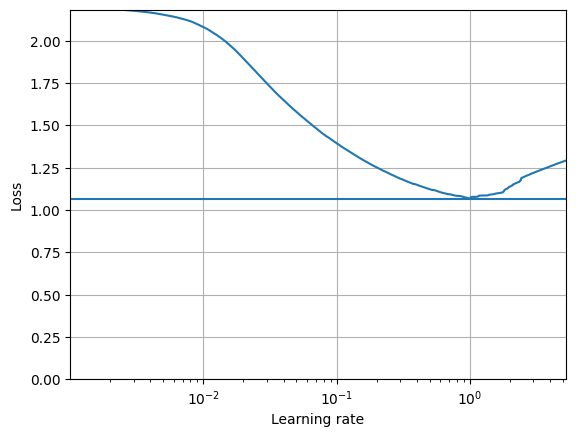

0.001040707

In [233]:
import matplotlib.pyplot as plt
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.show()


expon_lr.rates[np.argmax(expon_lr.losses)]


In [234]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=keras.optimizers.SGD(learning_rate=0.5), 
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/1000
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2612 - accuracy: 0.9197 - val_loss: 19.0411 - val_accuracy: 0.9567
Epoch 2/1000
1719/1719 [==============================] - 2s 955us/step - loss: 0.1123 - accuracy: 0.9655 - val_loss: 16.6154 - val_accuracy: 0.9707
Epoch 3/1000
1719/1719 [==============================] - 2s 990us/step - loss: 0.0806 - accuracy: 0.9750 - val_loss: 10.2734 - val_accuracy: 0.9816
Epoch 4/1000
1719/1719 [==============================] - 2s 961us/step - loss: 0.0630 - accuracy: 0.9803 - val_loss: 9.8723 - val_accuracy: 0.9815
Epoch 5/1000
1719/1719 [==============================] - 2s 968us/step - loss: 0.0551 - accuracy: 0.9828 - val_loss: 8.5534 - val_accuracy: 0.9856
Epoch 6/1000
1719/1719 [==============================] - 2s 975us/step - loss: 0.0459 - accuracy: 0.9859 - val_loss: 7.8117 - val_accuracy: 0.9866
Epoch 7/1000
1719/1719 [==============================] - 2s 974us/step - loss: 0.0391 - accuracy: 0.9878 - val